In [2]:
# Importing all necessary libraries
import json

import matplotlib.pyplot as plt

from math import *

In [6]:
# Create a list with of amounts of data for this experiment
data_amounts = [0, 1000, 2000, 3000, 4000, 5000, 10000, 20000, 30000, 40000, 50000, 60000]
base_path = "/Users/pavelvavilov/Desktop/Topology_in_Neural_Networks/mnist_dataset/mnist_output/exp_1/weights_graphs_mlp"

In [4]:
def read_barcode_data(barcode_json_path: str) -> list:
    ''' 
    Returns data from JSON file, sorted with NNs layers
    Params:
    barcode_json_path - path to file with data
    Return:
    layer1, ..., layer3 - three lists with data for each layer
    '''
    with open(barcode_json_path, 'r') as data:
        barcodes = json.load(data)

    layer1, layer2, layer3 = list(), list(), list()

    for epoch in list(barcodes.keys()):
        layer1.append(barcodes[epoch]['layer1'])
        layer2.append(barcodes[epoch]['layer2'])
        layer3.append(barcodes[epoch]['layer3'])

    return layer1, layer2, layer3

def load_barcode_data(amounts: list, base_path: str) -> dict:
    ''' 
    Call read_barcode_data func and put it in one dict with amount of data
    as a key and a list of data as a value
    Params:
    amounts - list with data amount numbers
    base_path - common path to all files with data 
    Return:
    Dictionary with data amounts as keys and the data as values 
    '''
    barcode_data = {}
    for amount in amounts:
        path = f"{base_path}_DataAmount{amount}/barcodes/barcode_data.json"
        barcode_data[amount] = read_barcode_data(barcode_json_path=path)
    return barcode_data

In [7]:
# Loading data
barcode_layers = load_barcode_data(data_amounts, base_path)

In [8]:
def calculate_homology_mean_lifetime(layer: list) -> float:
    ''' 
    Calculates the homogies mean lfietimes for one layer
    Params:
    layer - data for one layer
    Return:
    Mean lifetime value
    '''
    last_epoch = layer[-1]['H0']
    lifetime = 0

    for i in range(len(last_epoch)):
        mean = (last_epoch[i][0] + last_epoch[i][1]) / 2
        lifetime += mean 

    mean_lifetime = lifetime / len(layer)

    return mean_lifetime

In [9]:
# Define a dictionary to store homologies mean lifetime
homology_dict = dict()

# Fill in defined dictionary
for i in range(3):
    for batch in data_amounts:
        homology_dict.setdefault(f'mean_lifetime_{i+1}_{batch}k', calculate_homology_mean_lifetime(barcode_layers[batch][i]))

In [12]:
# Create a list to store mean lifetimes per layers and per data amounts
layers = list()

# Fill in created list
for i in range(3):
    layer = list()
    for batch in data_amounts:
        layer.append(homology_dict[f'mean_lifetime_{i+1}_{batch}k'])
    layers.append(layer)

In [14]:
def plot_homologies_mean_lifetime_for_one_layer(mean_lifetime_value: float, data_amounts: list, layer_name: str) -> None:
    ''' 
    Build the graphs for data amounts and mean lifetime values
    Params:
    mean_lifetime_value - list of mean lifetime values
    data_amounts - list of data amounts for this experiment
    layer_name - name of a NNs hidden layer the graph belongs to
    Return:
    Graph for data amounts and mean lifetime values 
    '''
    plt.plot(data_amounts, mean_lifetime_value, marker='o')
    plt.title(layer_name)
    plt.xlabel('Data amounts')
    plt.ylabel('Mean lifetime')
    plt.grid(True)

    plt.show() 

In [36]:
def plot_graphs_grid(data_amounts: list, layers: list, label: str) -> None:
    ''' 
    Plots a grid of graphs for mean lifetime through the data amounts for each layer
    Params:
    data_amounts - list with data amounts
    layers - list with lists with layer data
    Return:
    None
    '''
    # Create figure and grid with 3 rows and 1 column with common X axis
    fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

    # Fill in the graphs
    for i, ax in enumerate(axes.flat):
        ax.plot(data_amounts, layers[i])
        ax.legend()
        ax.set_title(f'Layer {i+1}')
        ax.grid(True)

    # Label for common X axis
    fig.text(0.5, 0.04, 'Data amounts', ha='center', fontsize=12)
    fig.text(0.0001, 0.5, label, va='center', rotation='vertical', fontsize=12)

    # Add space between graphs
    plt.tight_layout(rect=[0, 0.05, 1, 1])  # Оставляем место для общей подписи
    plt.show()

/var/folders/nd/fsmv2lz93k3_cjwz_1lx75j80000gn/T/ipykernel_59654/592596862.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


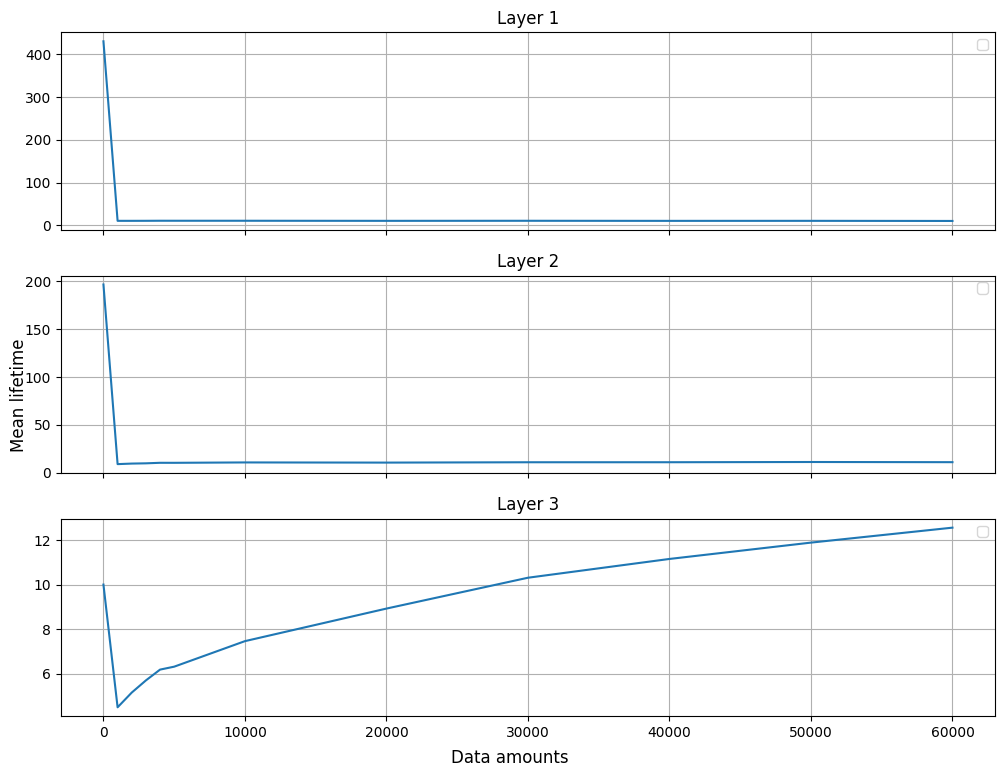

In [ ]:
plot_graphs_grid(data_amounts=data_amounts, layers=layers, label='Mean lifetime')

In [17]:
# ml - mean lifetime
def plot_ml_first_points(layers: list, data_amount: int) -> None:
    ''' 
    Plots graph for start mean lifetime points per each layer 
    Params:
    layers - list with mean lifetimes for each layer;
    data_amount - 0-0, 1-1000, 2-2000, 3-3000, 4-4000, 5-5000, 6-10000, 7-20000, 8-30000, 9-40000, 10-50000, 11-60000.
    Return:
    None
    '''
    l = [1, 2, 3]
    first_point = [lay[data_amount] for lay in layers]

    plt.plot(l, first_point, marker='o')
    plt.title('Mean lifetime start points per layer')
    plt.xlabel('Layer')
    plt.ylabel('Mean lfietime')
    plt.grid(True)

    plt.show()

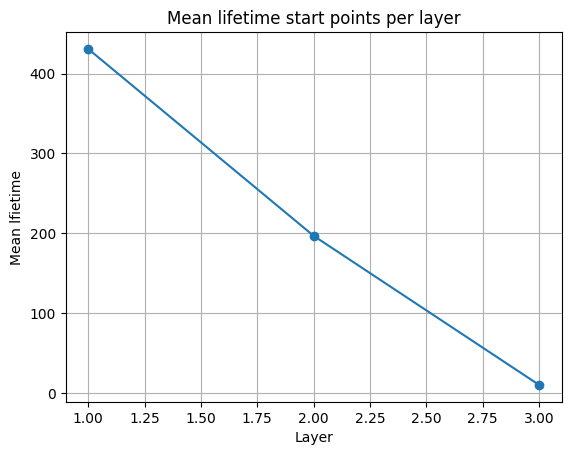

In [18]:
plot_ml_first_points(layers, 0)

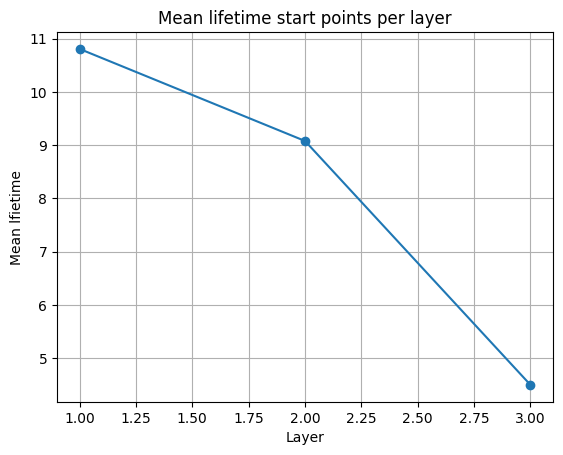

In [19]:
plot_ml_first_points(layers, 1)

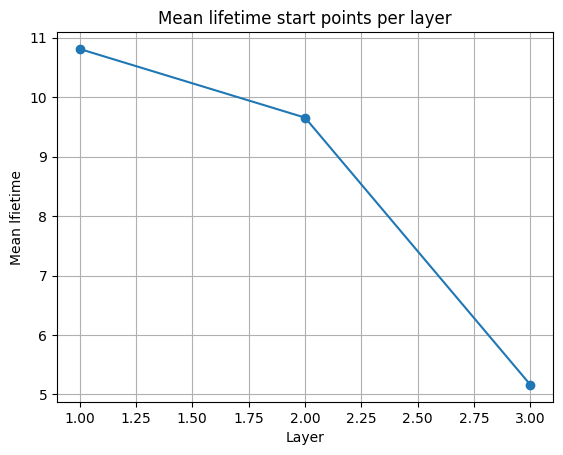

In [20]:
plot_ml_first_points(layers, 2)

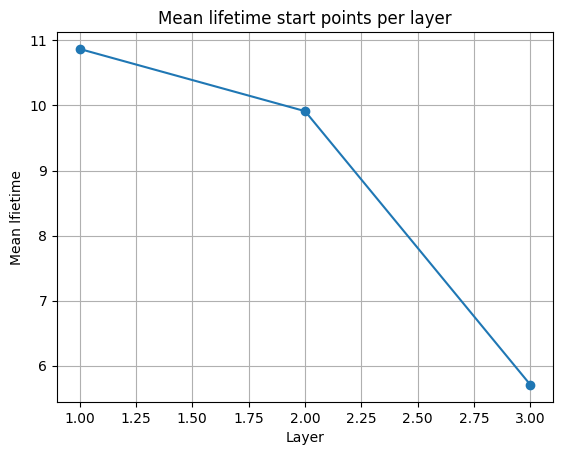

In [21]:
plot_ml_first_points(layers, 3)

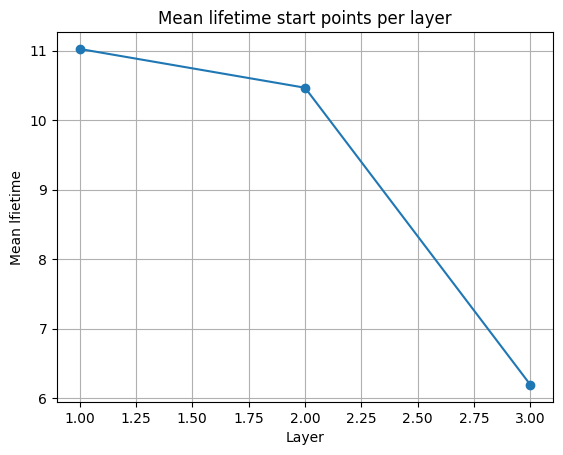

In [22]:
plot_ml_first_points(layers, 4)

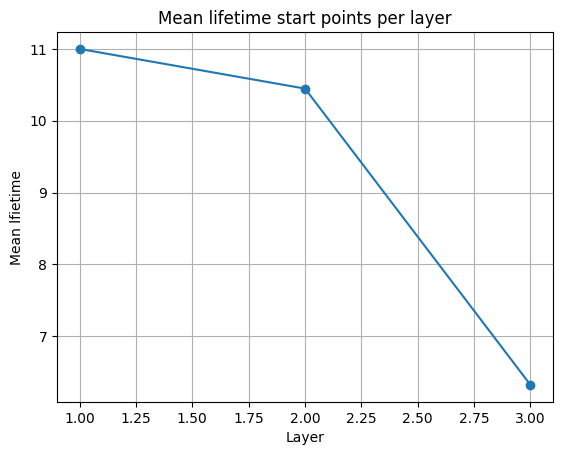

In [23]:
plot_ml_first_points(layers, 5)

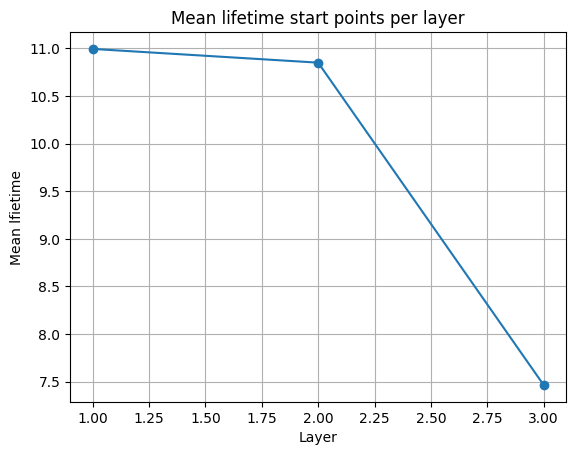

In [24]:
plot_ml_first_points(layers, 6)

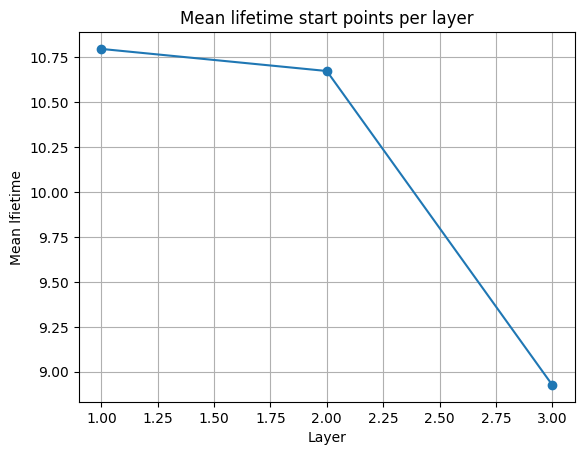

In [25]:
plot_ml_first_points(layers, 7)

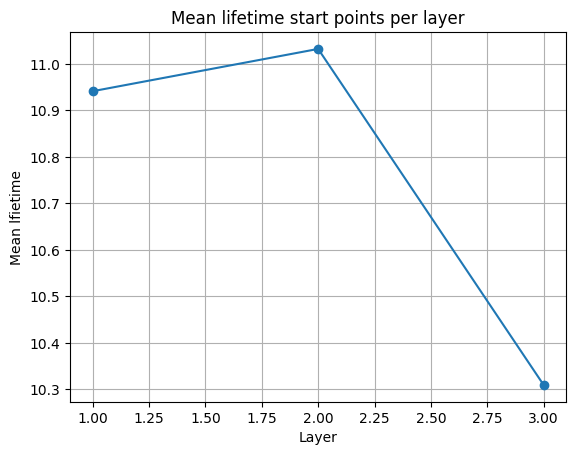

In [26]:
plot_ml_first_points(layers, 8)

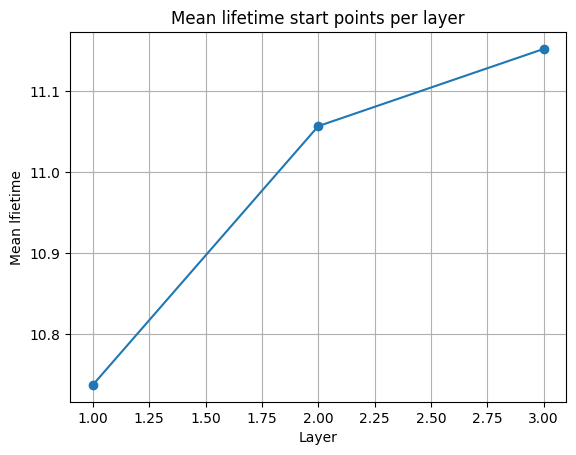

In [27]:
plot_ml_first_points(layers, 9)

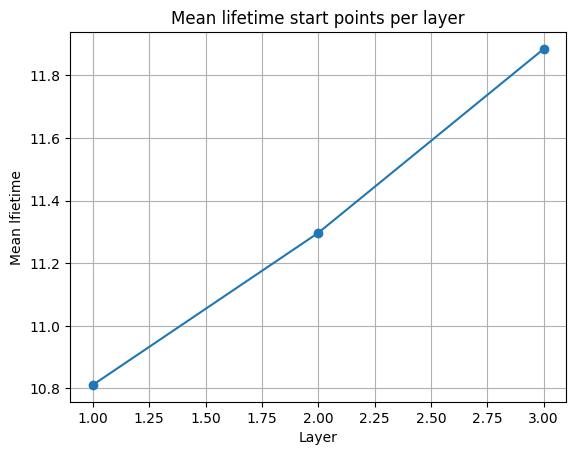

In [28]:
plot_ml_first_points(layers, 10)

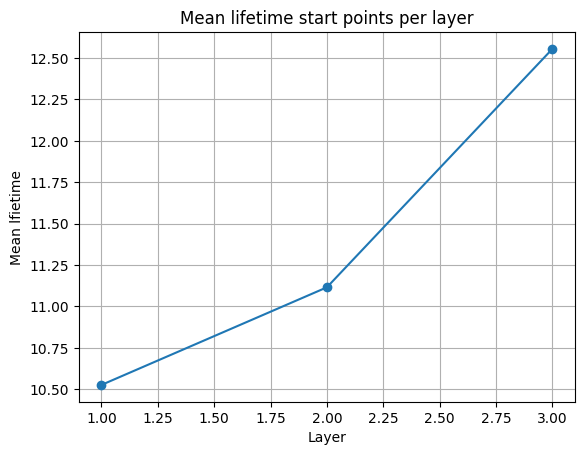

In [29]:
plot_ml_first_points(layers, 11)

In [30]:
def calculate_entropy(layer: list) -> float:
    ''' 
    Calculates entropy for each layer in NNs
    Params:
    layer - data for one layer
    Return:
    Value of an entropy for with layer
    '''
    last_epoch = layer[-1]['H0']
    pair_difference = list()

    for pair in last_epoch:
        pair_difference.append(pair[1] - pair[0])
    
    result = list()
    for diff_pair in pair_difference:
        result.append(diff_pair / sum(pair_difference))

    h = 0
    for elem in result:
        if elem == 0:
            pass
        else:
            h =+ elem * log2(elem)

    return -h

In [41]:
# Define a dictionary to store homologies mean lifetime
entropy_dict = dict()

# Fill in defined dictionary
for i in range(3):
    for batch in data_amounts:
        entropy_dict.setdefault(f'entropy_{i+1}_{batch}k', calculate_entropy(barcode_layers[batch][i]))

In [42]:
# Create a list to store mean lifetimes per layers and per data amounts
layers_ent = list()

# Fill in created list
for i in range(3):
    layer_ent = list()
    for batch in data_amounts:
        layer_ent.append(entropy_dict[f'entropy_{i+1}_{batch}k'])
    layers_ent.append(layer)

In [33]:
def plot_entropy_for_one_layer(ent_value: float, data_amounts: list, layer_name: str, name: str) -> None:
    ''' 
    Build the graphs for data amounts and entropy values
    Params:
    ent_value - list of entropy values
    data_amounts - list of data amounts for this experiment
    layer_name - name of a NNs hidden layer the graph belongs to
    Return:
    Graph for data amounts and entropy values 
    '''
    plt.plot(data_amounts, ent_value, marker='o')
    plt.title(layer_name)
    plt.xlabel('Data amounts')
    plt.ylabel(name)
    plt.grid(True)

    plt.show() 

/var/folders/nd/fsmv2lz93k3_cjwz_1lx75j80000gn/T/ipykernel_59654/2911205494.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


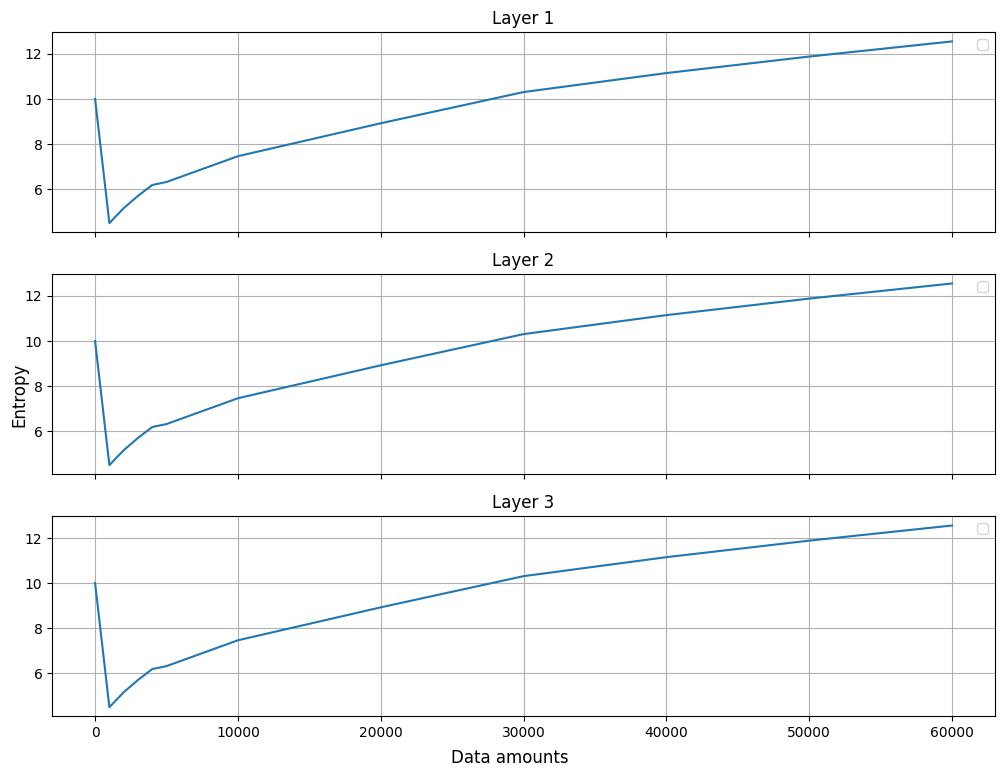

In [43]:
plot_graphs_grid(data_amounts=data_amounts, layers=layers_ent, label='Entropy')

In [38]:
def calculate_norm_persist_entropy(layer: list) -> list:
    ''' 
    Calculates normalized persistent entropy from basic entropy
    Params:
    layers_ent - list with entropy values for each layer and each data amount
    Return:
    Normilized entropy for specific layer and amount of data
    '''
    last_epoch = layer[-1]['H0']
    pair_difference = list()

    for pair in last_epoch:
        pair_difference.append(pair[1] - pair[0])
    
    result = list()
    for diff_pair in pair_difference:
        result.append(diff_pair / sum(pair_difference))

    h = 0
    for elem in result:
        if elem == 0:
            pass
        else:
            h =+ elem * log2(elem)

    return -h / log2(len(pair_difference))

In [44]:
# Define a dictionary to store homologies mean lifetime
norm_entropy_dict = dict()

# Fill in defined dictionary
for i in range(3):
    for batch in data_amounts:
        norm_entropy_dict.setdefault(f'norm_entropy_{i+1}_{batch}k', calculate_norm_persist_entropy(barcode_layers[batch][i]))

In [45]:
# Create a list to store mean lifetimes per layers and per data amounts
layers_norm_ent = list()

# Fill in created list
for i in range(3):
    layer_norm_ent = list()
    for batch in data_amounts:
        layer_norm_ent.append(norm_entropy_dict[f'norm_entropy_{i+1}_{batch}k'])
    layers_norm_ent.append(layer)

/var/folders/nd/fsmv2lz93k3_cjwz_1lx75j80000gn/T/ipykernel_59654/2911205494.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


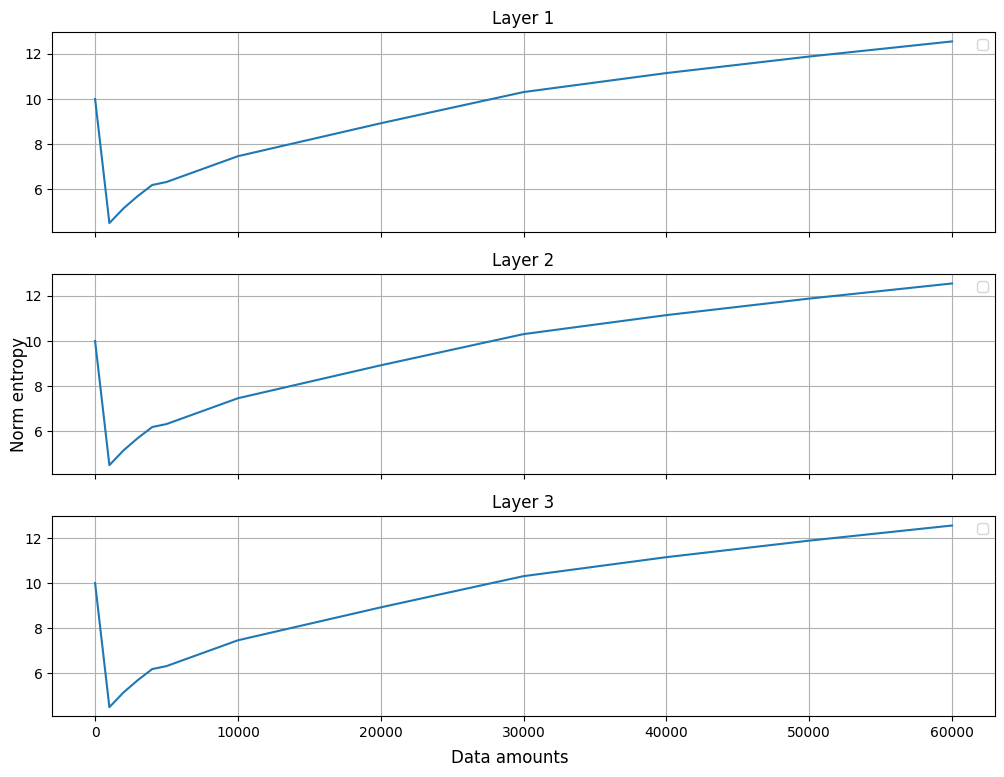

In [46]:
plot_graphs_grid(data_amounts=data_amounts, layers=layers_norm_ent, label='Norm entropy')